In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

Dataset: The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

In [52]:
df = pd.read_csv('../datasets/SeoulBikeData.csv').drop(['Date', 'Seasons', 'Holiday'], axis=1)
df.columns = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [53]:
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [54]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


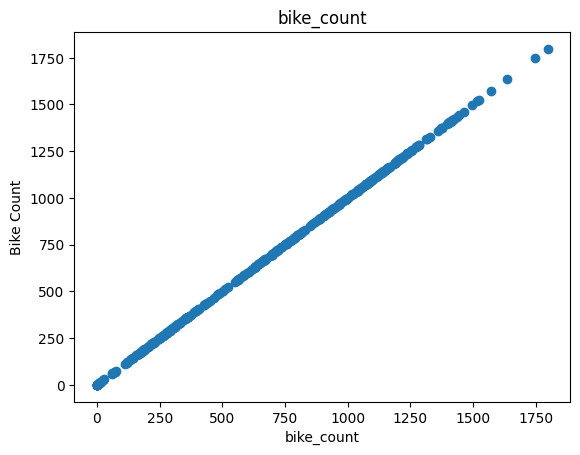

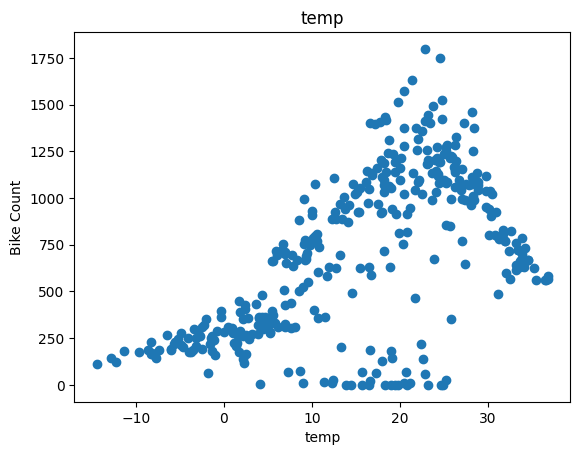

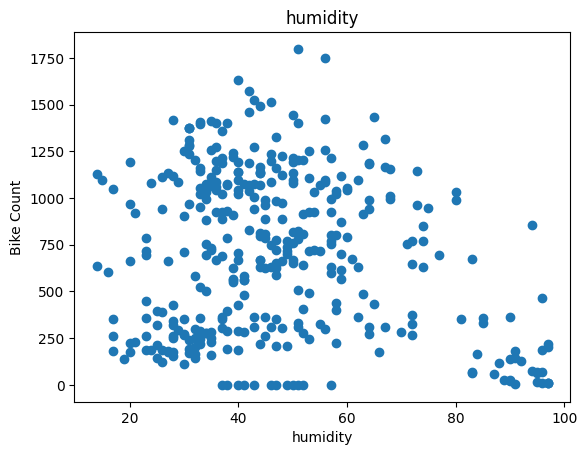

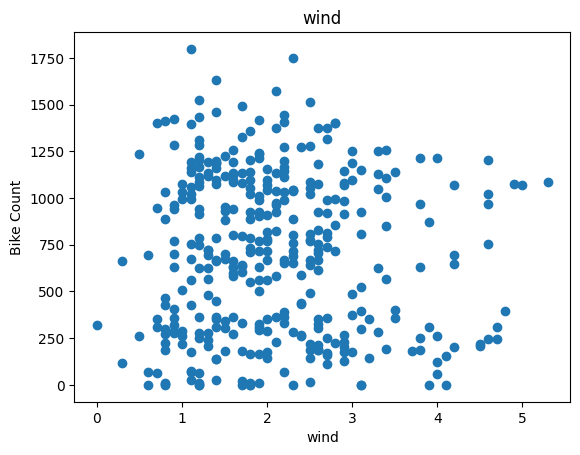

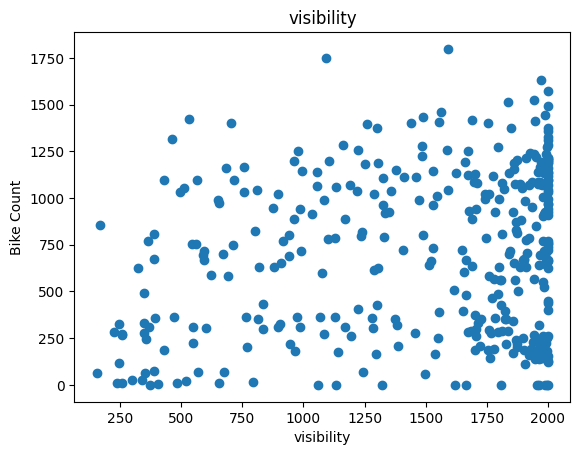

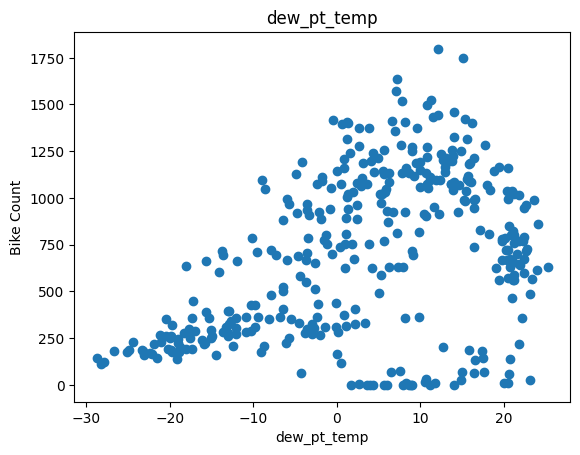

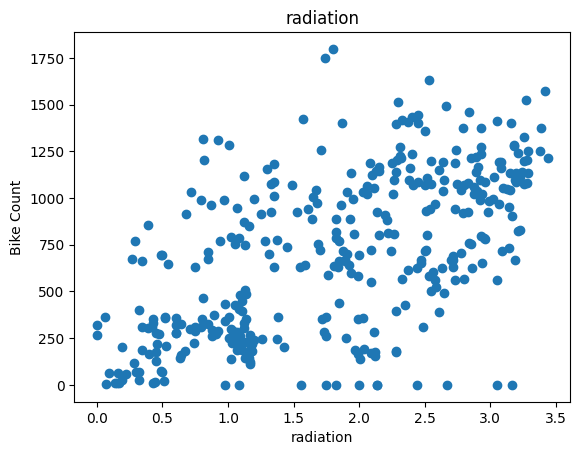

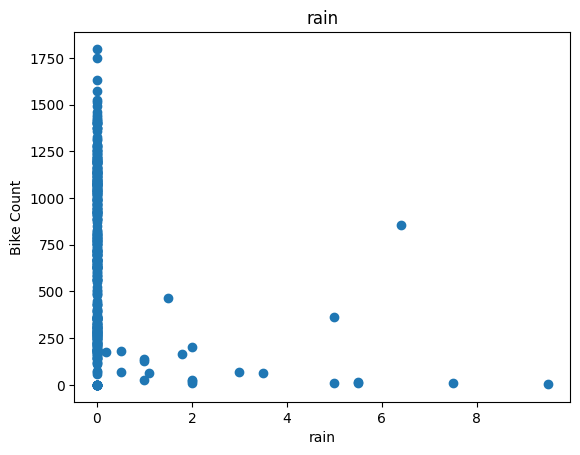

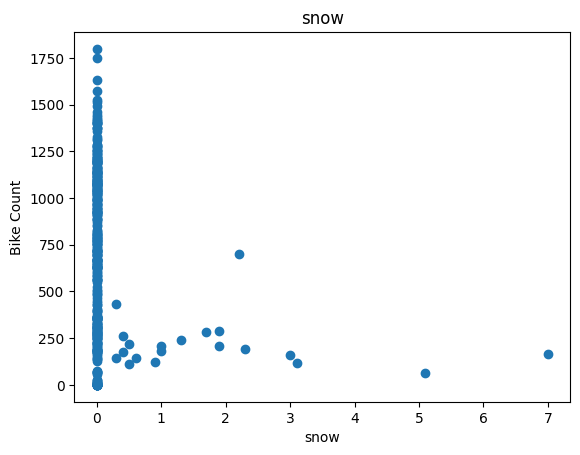

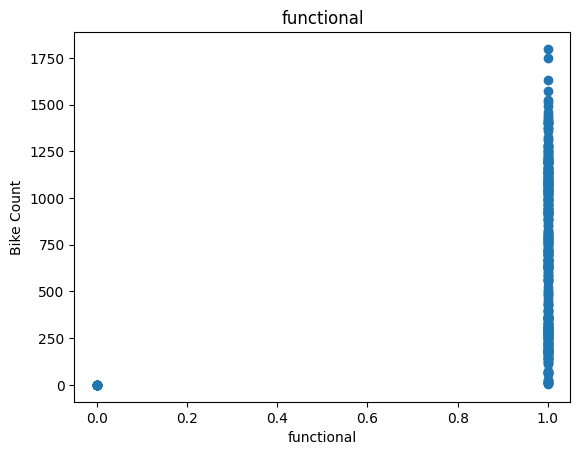

In [55]:
for label in df.columns:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Bike Count')
    plt.show()

In [56]:
df = df.drop(['wind', 'visibility','functional'], axis=1)

In [57]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Creating train, validation and test dataset

In [58]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

d:\machine learning\JupiterNotebook\venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [59]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values
    
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

# Prediction using Simple Linear Regression

In [60]:
_, x_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, x_validation_temp, y_validation_temp = get_xy(validation, 'bike_count', x_labels=['temp'])
_, x_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
linear_r_model = LinearRegression()
linear_r_model.fit(x_train_temp, y_train_temp)

LinearRegression()

In [63]:
linear_r_model.score(x_test_temp, y_test_temp)

0.34887031478643726

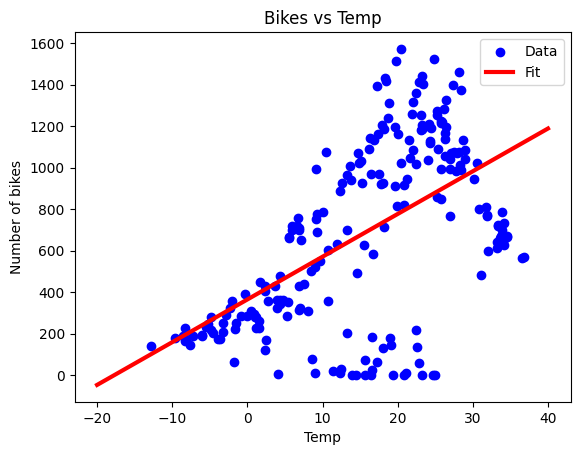

In [64]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, linear_r_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Prediction using Multiple Linear Regression

In [65]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train, y_train = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, x_validation, y_validation = get_xy(validation, 'bike_count', x_labels=df.columns[1:])
_, x_test, y_test = get_xy(test, 'bike_count', x_labels=df.columns[1:])

d:\machine learning\JupiterNotebook\venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [66]:
linear_r_model = LinearRegression()
linear_r_model.fit(x_train, y_train)

LinearRegression()

In [67]:
linear_r_model.score(x_test, y_test)

0.3428219598083948

In [68]:
y_predict = linear_r_model.predict(x_test)

In [69]:
y_predict

array([[ 356.97347317],
       [ 240.88518702],
       [ 836.54885951],
       [ 980.97778756],
       [ 622.94320827],
       [ 973.73690661],
       [1031.03576012],
       [ 941.64839326],
       [ 862.99982712],
       [ 782.96197223],
       [ 581.64451184],
       [ 927.99128333],
       [ 777.30824163],
       [ 164.41066669],
       [ 793.71004308],
       [ 378.67240859],
       [ 943.96087358],
       [ 805.0807075 ],
       [ 462.33567209],
       [ 342.9556456 ],
       [ 487.7119917 ],
       [ 512.72889264],
       [ 420.6990138 ],
       [ 821.87227096],
       [ 376.52530272],
       [1171.20109666],
       [ 864.37621809],
       [ 838.33409675],
       [ 586.02222781],
       [ 814.38754955],
       [ 270.08859401],
       [ 950.76010671],
       [1089.52779963],
       [ 673.16833255],
       [ 819.93426589],
       [ 915.7126381 ],
       [ 892.8238573 ],
       [1057.39729195],
       [ 766.52563786],
       [ 840.08632352],
       [1044.82322129],
       [-522.691